# Display fish individuals for annotation assistance

{'fish10': 142, 'fish11': 26, 'fish12': 14, 'fish14': 12, 'fish16': 75, 'fish17': 489, 'fish19': 316, 'fish2': 14, 'fish20': 86, 'fish21': 75, 'fish22': 86, 'fish3': 460, 'fish5': 45, 'fish6': 11, 'fish7': 272, 'fish9': 269}


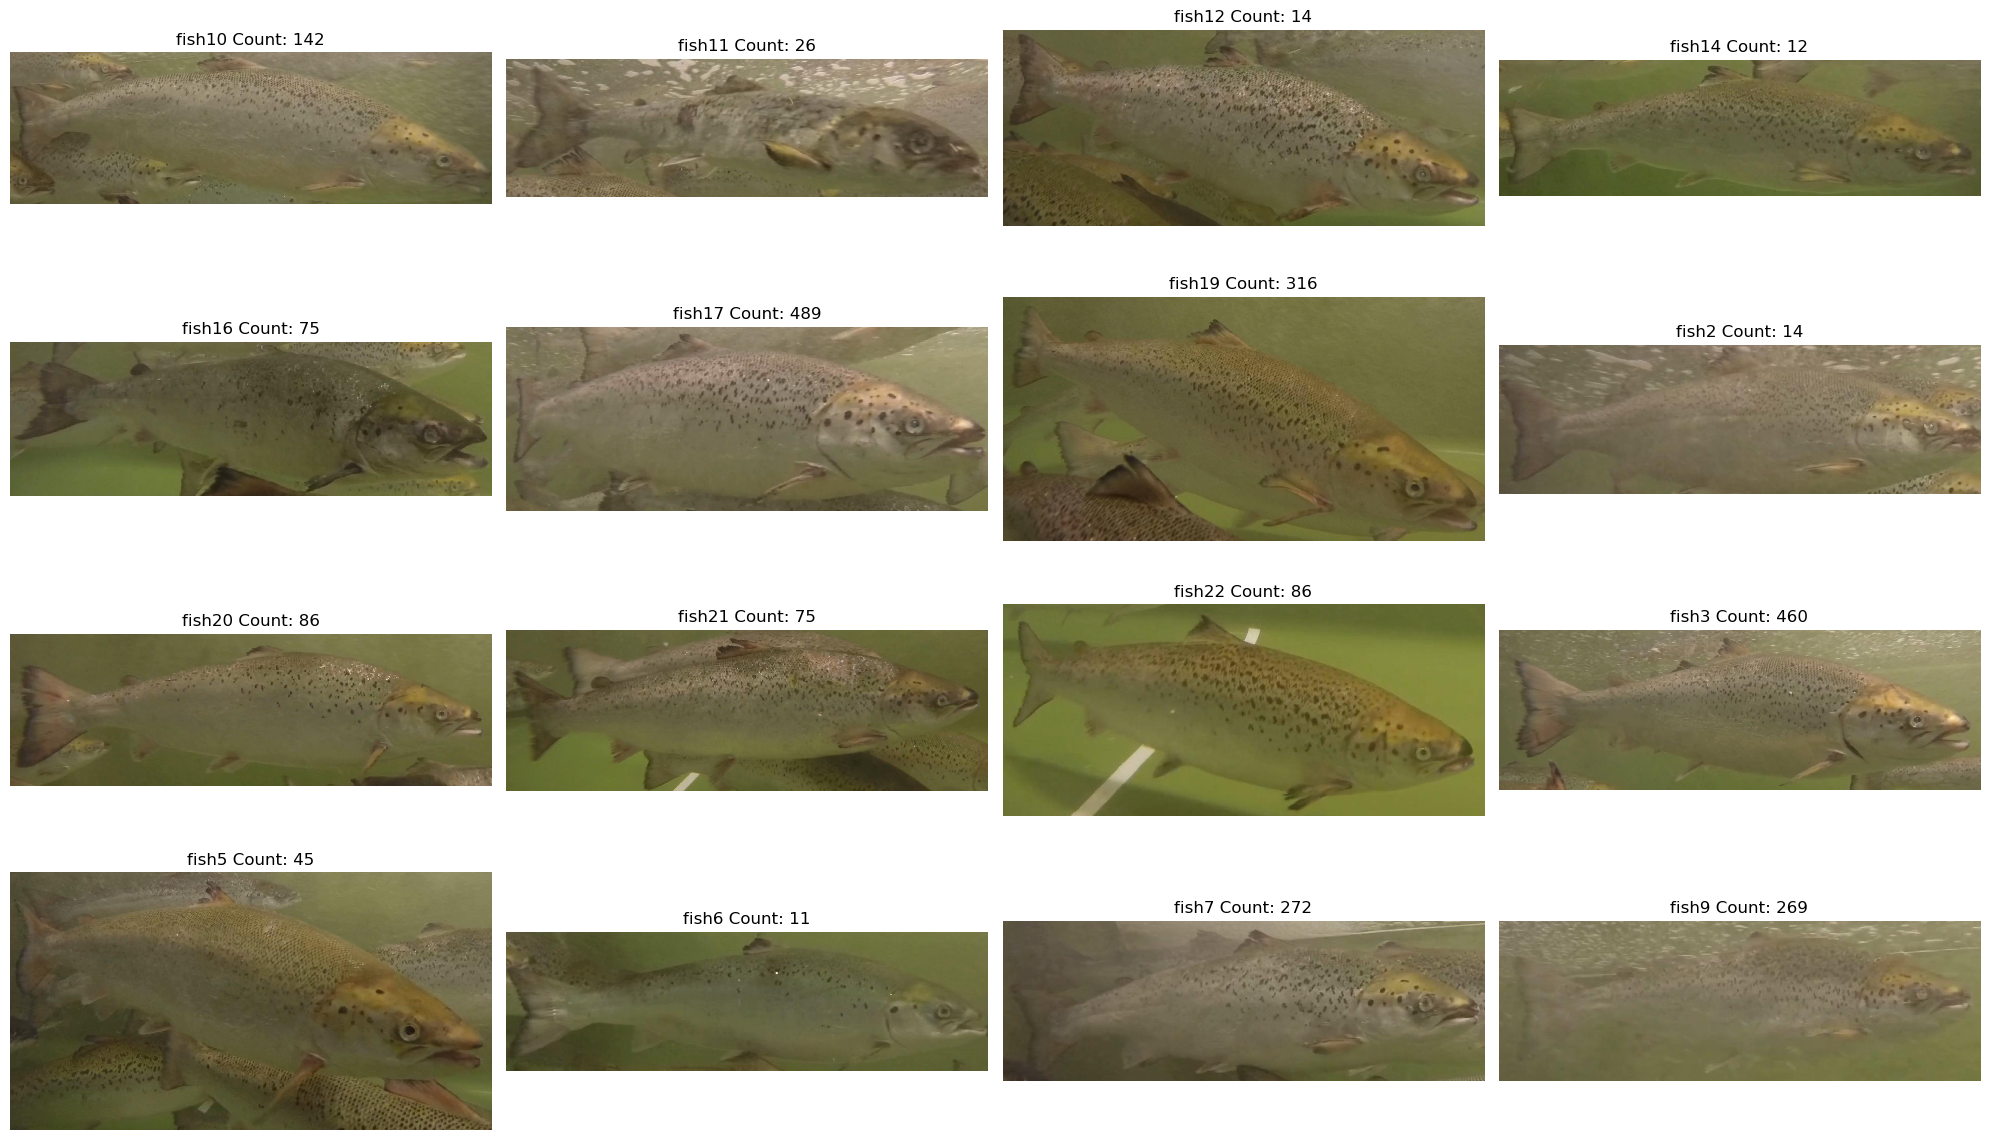

/Users/magnuswiik/miniconda3/envs/fisketrening/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/magnuswiik/miniconda3/envs/fisketrening/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/magnuswiik/miniconda3/envs/fisketrening/lib/python3.9/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/Users/magnuswiik/miniconda3/envs/fisketrening/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprec

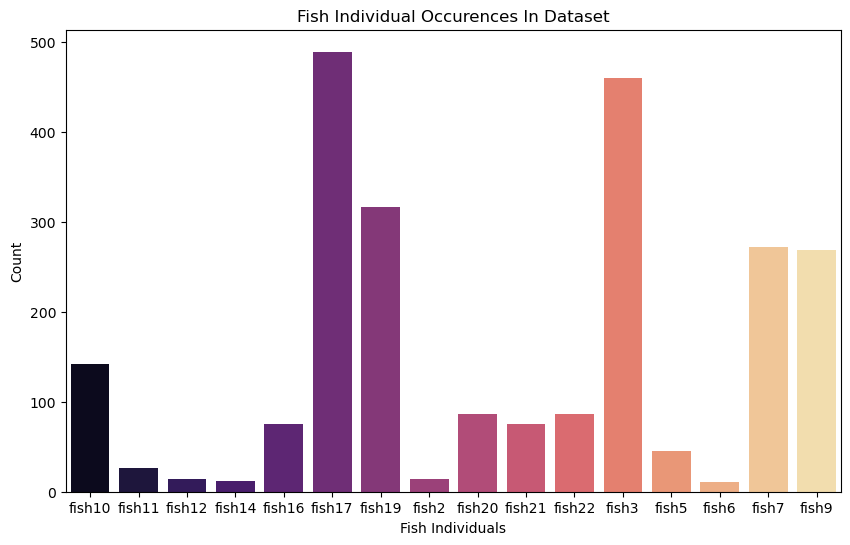

In [1]:
import matplotlib.pyplot as plt
import os
from PIL import Image
import seaborn as sns
import pandas as pd

# Path to the folder containing the images
data_path = "/Users/magnuswiik/prosjektoppgave_data/Masteroppgave_data/Helfisk_Landmark_Deteksjonssett/"

fishes = sorted(os.listdir(data_path))[1:-1] # Remove DS_Store and old folder

fish_count = {}

# Create a figure and axes
fig, axes = plt.subplots(4, 4, figsize=(4 * 5, 4 * 3))

# Loop through the image files and plot them in the grid
for i in range(len(fishes)):
    if fishes[i][0] != '.' and fishes[i] != 'old':
        # Load the image
        folder_path = os.path.join(data_path, fishes[i])
        image_files = [file for file in os.listdir(folder_path) if file.endswith('jpg')]
        image = Image.open(os.path.join(folder_path, image_files[0]))
        fish = image_files[0].split("_")[0]
        fish_count[fish] = len(image_files)

        row = i // 4  # Calculate row index
        col = i % 4   # Calculate column index
        axes[row, col].imshow(image, interpolation='nearest')  # Use nearest neighbor interpolation
        
        axes[row, col].set_title(fish + ' Count: ' + str(len(image_files)))
        axes[row, col].axis('off') 
        
print(fish_count)
# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()


plt.figure(figsize=(10, 6))
x_val = list(fish_count.keys())
y_val = list(fish_count.values())

sns.barplot(x=x_val, y=y_val, palette="magma")
plt.xlabel('Fish Individuals')
plt.ylabel('Count')
plt.title('Fish Individual Occurences In Dataset')
plt.show()